In [2]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm

In [3]:
domain = np.arange (0.0,1.0001,0.001)      

def prior(theta):
    return ((math.cos(4.0*math.pi*theta)+1.0)**2.0)/1.5
priorV = np.vectorize(prior)


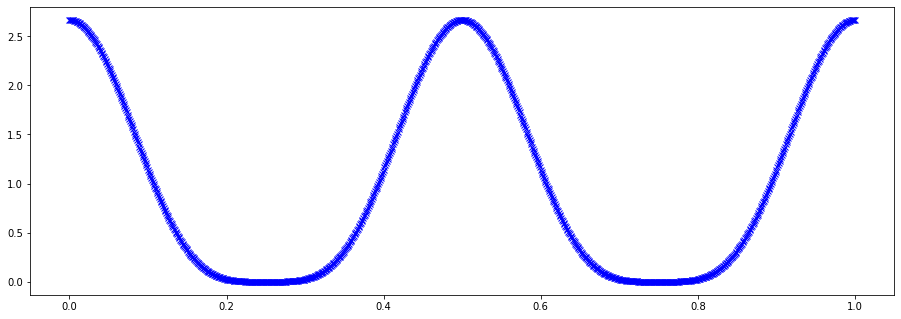

In [4]:
fig = plt.figure();
ax = fig.add_axes([0,0,2,1])

ax.plot(domain, priorV(domain), 'xb') #, width=0.01)
#ax.axis([-0.05, 1.05, 0.0, 2.0e-10])
plt.show()

In [5]:
data = [] #np.concatenate((np.repeat(0,6), np.repeat(1,14)), axis=0)

In [65]:
def likelihood(theta, data):
    z = np.sum(data)
    N = np.size(data)
    pDataGivenTheta = theta**z * (1-theta)**(N-z)
    if(theta > 1 or theta < 0): # maybe move this to the algorithm?
        return 0
    else:
        return pDataGivenTheta



In [67]:
def targetRelProb(theta, data):
    targetRelProb = likelihood(theta, data) * prior(theta)
    return targetRelProb

In [87]:
trajLength = 50000 # arbitrary large number
# Initialize the vector that will store the results:
trajectory = np.repeat( 0.0 , trajLength )
# Specify where to start the trajectory:
trajectory[0] = .1# arbitrary value
# Specify the burn-in period:
burnIn = 500 # arbitrary number, less than trajLength

nAccepted = 0
nRejected = 0
deviation = 0.2
np.random.seed(47405)

In [88]:
for x in range(trajLength-1):
    currentPosition = trajectory[x]
    proposedJump = np.random.normal(loc=0.0, scale=deviation)
    probAccept = min(1, targetRelProb((currentPosition + proposedJump), data) / targetRelProb(currentPosition, data))
    if(np.random.uniform() < probAccept):
        trajectory[x+1] = currentPosition + proposedJump
        if(x > burnIn):
            nAccepted = nAccepted+1
    else:
        trajectory[ x+1 ] = currentPosition
        if ( x > burnIn ):
            nRejected = nRejected + 1 

acceptedTraj = trajectory[burnIn:]


accepted: 18256
rejected: 31242


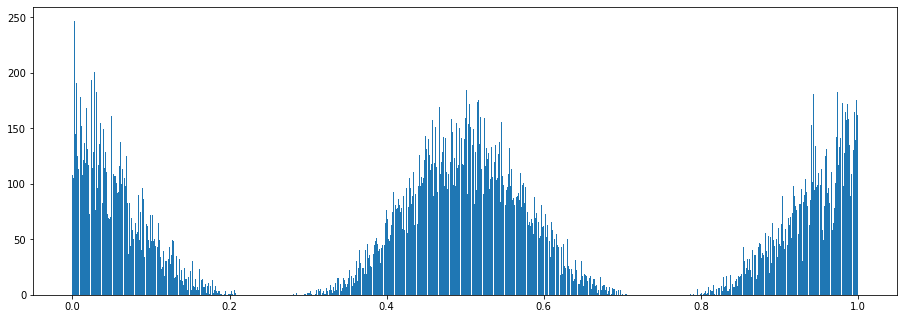

In [89]:
fig = plt.figure();
ax = fig.add_axes([0,0,2,1])
bins = np.arange(0, 1.0001, 0.001)
hist = ax.hist(acceptedTraj, bins, rwidth=0.9, density=False)

#ax.plot(domain, acceptedTraj, 'xb') #, width=0.01)
#ax.axis([-0.05, 1.05, 0.0, 2.0e-10])
print("accepted: " + str(nAccepted))
print("rejected: " + str(nRejected))
plt.show()

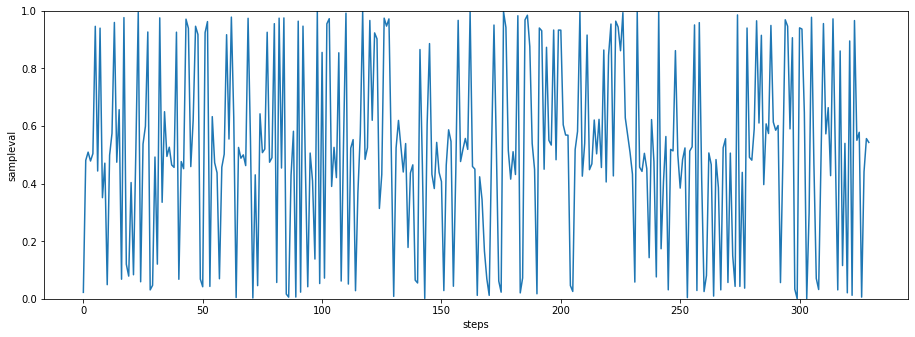

In [91]:
fig = plt.figure();
ax = fig.add_axes([0,0,2,1])

ax.set_xlabel('steps')
ax.set_ylabel('sampleval')
ax.set_ylim([0.0,1.0])
ax.plot(acceptedTraj[::150]) 